<a href="https://colab.research.google.com/github/Ajit9991/Ajit/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

**Machine Learning(32513)**

**Submitted by**

**Ajit Pokharkar- 12980746**

**Isha Dhawan - 13053119**

Available at:




In [0]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [0]:
import os
os.chdir('data/My Drive/ML Project')

**Introduction**

The purpose of this report is to predict the estimated time of arrival for the motorbike delivery order that are made on the Sendy platform in Nairobi. So, we are going to evaluate the given dataset that will help us to understand the problem in a more systematic way. We took this dataset from Zindi Africa Website.  The dataset we took has been generated by Sendy organization. Sendy is known for various services such as Developing and providing API for the web and mobile platform that link day to day who have conveyance needs with reviewed transporters.  This data set contains the order details and rider matrix. This data has been collected from the order that takes place on the Sendy platform. This data set contain 20,000 records of the orders that are directly linked to the bikes in Nairobi. As well, time factor also added to the data set to verify the authenticity of the data set.

**Algorithm** 

The algorithm we have used to analyze and predict a time is Support Vector Regression, Random Forest Regression and Linear Regression. In this report, we were dealing with the problem of estimating the accurate arrival time for motorbike delivery. A Random Forest perform regression as well as classification operation. This algorithm help us to give the variable importance of the dataset. We have used ensemble technique to give a better prediction for arrival time by comparing linear regression, random forest and support vector regression algorithms. We have represented the single algorithm results as well as ensemble method results with three algorithms.

**Random Forest**

Random forest is one of the many algorithms that are used in machine learning. This algorithm is based on the concept of ensemble learning. Ensemble learning can be defined as a process where you link various algorithms together to construct a robust prediction model. In simple words the process of joining multiple algorithms together or same algorithm numerous times to achieve the robust prediction model this whole process is called ensemble learning. It is a supervised machine learning algorithm. However, inside random forest we create a prediction model by joining numerous decision trees or numerous algorithms together that is why this algorithm is called as random forest.

Working
1.	Take few records from a given dataset
2.	Analyze the records that they are valid
3.	Construct a decision tree of the picked records
4.	From the multiple generated trees select only those trees that you require for the algorithm. 

This algorithm deals with two problems that are as follow.

1.	Regression Problem

With the case of a regression problem, for a specific record, each tree that you generated with deals with the Y-axis and will give the value for Y. To calculate the concluding value you have to find the average of all the values that are anticipated from the constructed trees.
2.	Classification Problem

With the case of a classification problem, the generated trees with anticipating the value that will tell about a specific category to which our record correlate.

Linear Regression **bold text**

This algorithm is one of the famous and most used machine learning algorithms. Most of the scientists, data analyzers and data handlers used this algorithm many times in their life because it is straightforward to understand, and its simple model makes it useful in complex working environments. It acts as a foundation stone for other machine learning algorithms.
Linear regression algorithm is used to deal with the factors that regulate profitability. Linear regression tends to be utilized to estimate deals in the coming a long time by breaking down the business information for earlier months. It can likewise be utilized to increase different bits of knowledge about client conduct.It helps to find and establish relationships among one or more independent variables and constant dependent variable. However, in case when linear regression deals with just one feature, it is depicted as Uni-variate, and in case of multiple, it is known as Multiple Linear regression.


SUPPORT VECTOR MACHINE

Support-vector machines are considered as learning models where with the association of learning algorithms prediction of available information is done which is required for classification and regression analysis


Challenges

The main challenge is to deal with the data and build the model that would predict an accurate arrival time of the goods delivery. To predict the arrival time of the rider, we need to consider an order pick up time and delivered time to the destination. Furthermore, this solution will help to improve the communication with the customer, save the cost of business and it will help to make a ahead plan for ordering. 

The below mentioned is the list of challenges: 

•	Use different data exploration techniques and other visualization techniques such as box plots and disc plots.

•	Data has pick up and drop latitude and longitude which we need to convert into points so that distance between the source and destination and points could be measured.

•	Other challenge was that, input in training data was incorrect so the outliers had to be removed.


Data inside the data Frame

we have used goods delivery data from Sendy platform which includes the order details, rider metrics and 20,000 direct orders data. There are different dataset we have imported to build the model name as Test.csv, Train.csv, Riders.csv, and Samplesubmission.csv data.

Variable Name-

•	Order No                                        
•	User Id                                         
•	Vehicle Type       
•	Platform Type
•	Personal  or Business                               
•	Placement - Day of Month                        
•	Placement - Weekday (Mo = 1)                    
•	Placement - Time                                
•	Confirmation - Day of Month                     
•	Confirmation - Time    
•	Confirmation - Weekday (Mo = 1)                 
•	Arrival at Pickup - Day of Month                
•	Arrival at Pickup - Weekday (Mo = 1)            
•	Arrival at Pickup - Time                        
•	Pickup - Day of Month                           
•	Pickup - Weekday (Mo = 1)                       
•	Pickup - Time                                   
•	Arrival at Destination - Day of Month           
•	Arrival at Destination - Weekday (Mo = 1)       
•	Arrival at Destination - Time                   
•	Distance (KM)                                   
•	Temperature       
•	Precipitation in millimetres
•	Pickup Lat
•	Pickup Long
•	Destination Lat
•	Destination Long
•	Rider Id
•	Time from Pickup to arrival        



# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import geopy.distance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Importing Data as DataFrames : 

In [0]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
rider_data = pd.read_csv('Riders.csv')
subbmissions = pd.read_csv('SampleSubmission.csv')

Checking the Train and Test data for Missing Values and distribution.

In the first stage of data pre-processing we have found the sum of missing values variables in Test and train dataset by using .isna() function. Furthermore, we have designed the heatmap to find the highly correlated features in train dataset. Now we have missing values variable and correlated variables which we were going to drop to increase the consistency of the dataset. 

In [0]:
train.shape

(21201, 29)

In [0]:
test.shape

(7068, 25)

In [0]:
train.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
test.isna().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

**Checking Quartiles.**

In [0]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [0]:
test.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [0]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


**Highly Correlated Features :**

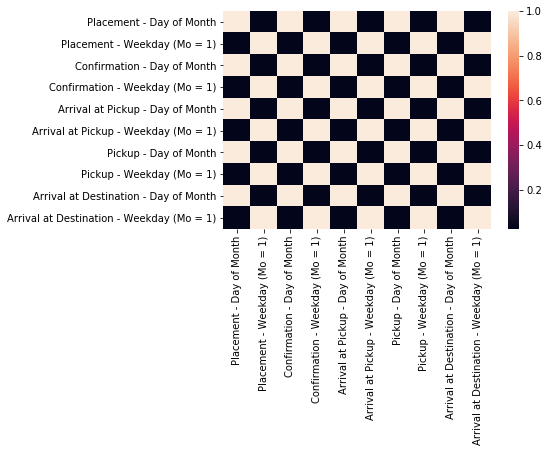

In [0]:
sns.heatmap(train[['Placement - Day of Month','Placement - Weekday (Mo = 1)','Confirmation - Day of Month',
                'Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)',
               'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)']].corr())

In the above figure, we can see how placement times, arrival times, confirmation times, pickup times and destination times are highly correlated with each other. Thus, we have dropped them to remove the redundancy in the dataset. 

**'Vehicle Type' is constant and 'Percipitation in millimeters has too many missing values.
Also as we can see in the above heatmap these features are highly correlated and thus dropped.**

In [0]:
train.drop(['Confirmation - Day of Month','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)',
              'Arrival at Destination - Time','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month',
              'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)'], axis = 1, inplace = True)
test.drop(['Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month',
              'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)'], axis = 1, inplace = True)

In [0]:
train.drop([ 'Vehicle Type', 'Precipitation in millimeters'], axis = 1, inplace = True)
test.drop([ 'Vehicle Type', 'Precipitation in millimeters'], axis = 1, inplace = True)

**Temperature has missing values and these are being replace by the mean Temperature value.**


As we can see the temperature variable has a small number in missing values, which we have replaced by the mean of temperature value. 

In [0]:
train['Temperature'].fillna(train['Temperature'].mean(), inplace = True)
test['Temperature'].fillna(train['Temperature'].mean(), inplace = True)

**Along with 'Distance (KM)' variable we also calculate 'distance' using Geopy module.**

In [0]:
def distance_calculator(dataset):
    return geopy.distance.distance((dataset['Pickup Lat'], dataset['Pickup Long']), (dataset['Destination Lat'], dataset['Destination Long'])).km

train['distance'] = train.apply(distance_calculator, axis=1)
test['distance'] = test.apply(distance_calculator, axis=1)

**Dropping the old Lat-Long features.**

In [0]:
train.drop(['Pickup Lat','Pickup Long','Destination Lat','Destination Long'], axis = 1, inplace = True)
test.drop(['Pickup Lat','Pickup Long','Destination Lat','Destination Long'], axis = 1, inplace = True)

**Using datetime and functions to calculate difference between the different times such as (Pickup, Arrival, Confirmation, Placement.)**

Additionally, we have calculated the distance by using geopy module with pickup long, pickup lat, destination long and destination lat variables and dropped these variables after the distance calculation to improve the integrity of the data.

 We have developed different time functions called pickup_arrival_time, arrival_confirm_time and confirm_placement_time to calculate the difference between different times and then drop original variables of time. Furthermore, we have designed visualization to understand the variables of the dataset. To design the visuals, we have used different plot functions like distplot(), countplot(), regplot(), and boxplot().

In [0]:
time_format = "%I:%M:%S %p"

def pickup_arrival_time(dataset):
  return(divmod((dt.strptime(dataset['Pickup - Time'], time_format) - dt.strptime(dataset['Arrival at Pickup - Time'], time_format)).seconds,60)[0] + 1)

train['diff_pickup_arrival'] = train.apply(pickup_arrival_time, axis = 1)
test['diff_pickup_arrival'] = test.apply(pickup_arrival_time, axis = 1)



def arrival_confirm_time(dataset):
  return(divmod((dt.strptime(dataset['Arrival at Pickup - Time'], time_format) - dt.strptime(dataset['Confirmation - Time'], time_format)).seconds,60)[0] + 1)

train['diff_arrival_confirm'] = train.apply(arrival_confirm_time, axis = 1)
test['diff_arrival_confirm'] = test.apply(arrival_confirm_time, axis = 1)




def confirm_placement_time(dataset):
  return(divmod((dt.strptime(dataset['Confirmation - Time'], time_format) - dt.strptime(dataset['Placement - Time'], time_format)).seconds,60)[0] + 1)

train['diff_confirm_placement'] = train.apply(confirm_placement_time, axis = 1)
test['diff_confirm_placement'] = test.apply(confirm_placement_time, axis = 1)

## Dropping Time features after extracting time difference.

In [0]:
train.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis = 1, inplace = True)
test.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis = 1, inplace = True)

**Visualizing features to better understand them.**

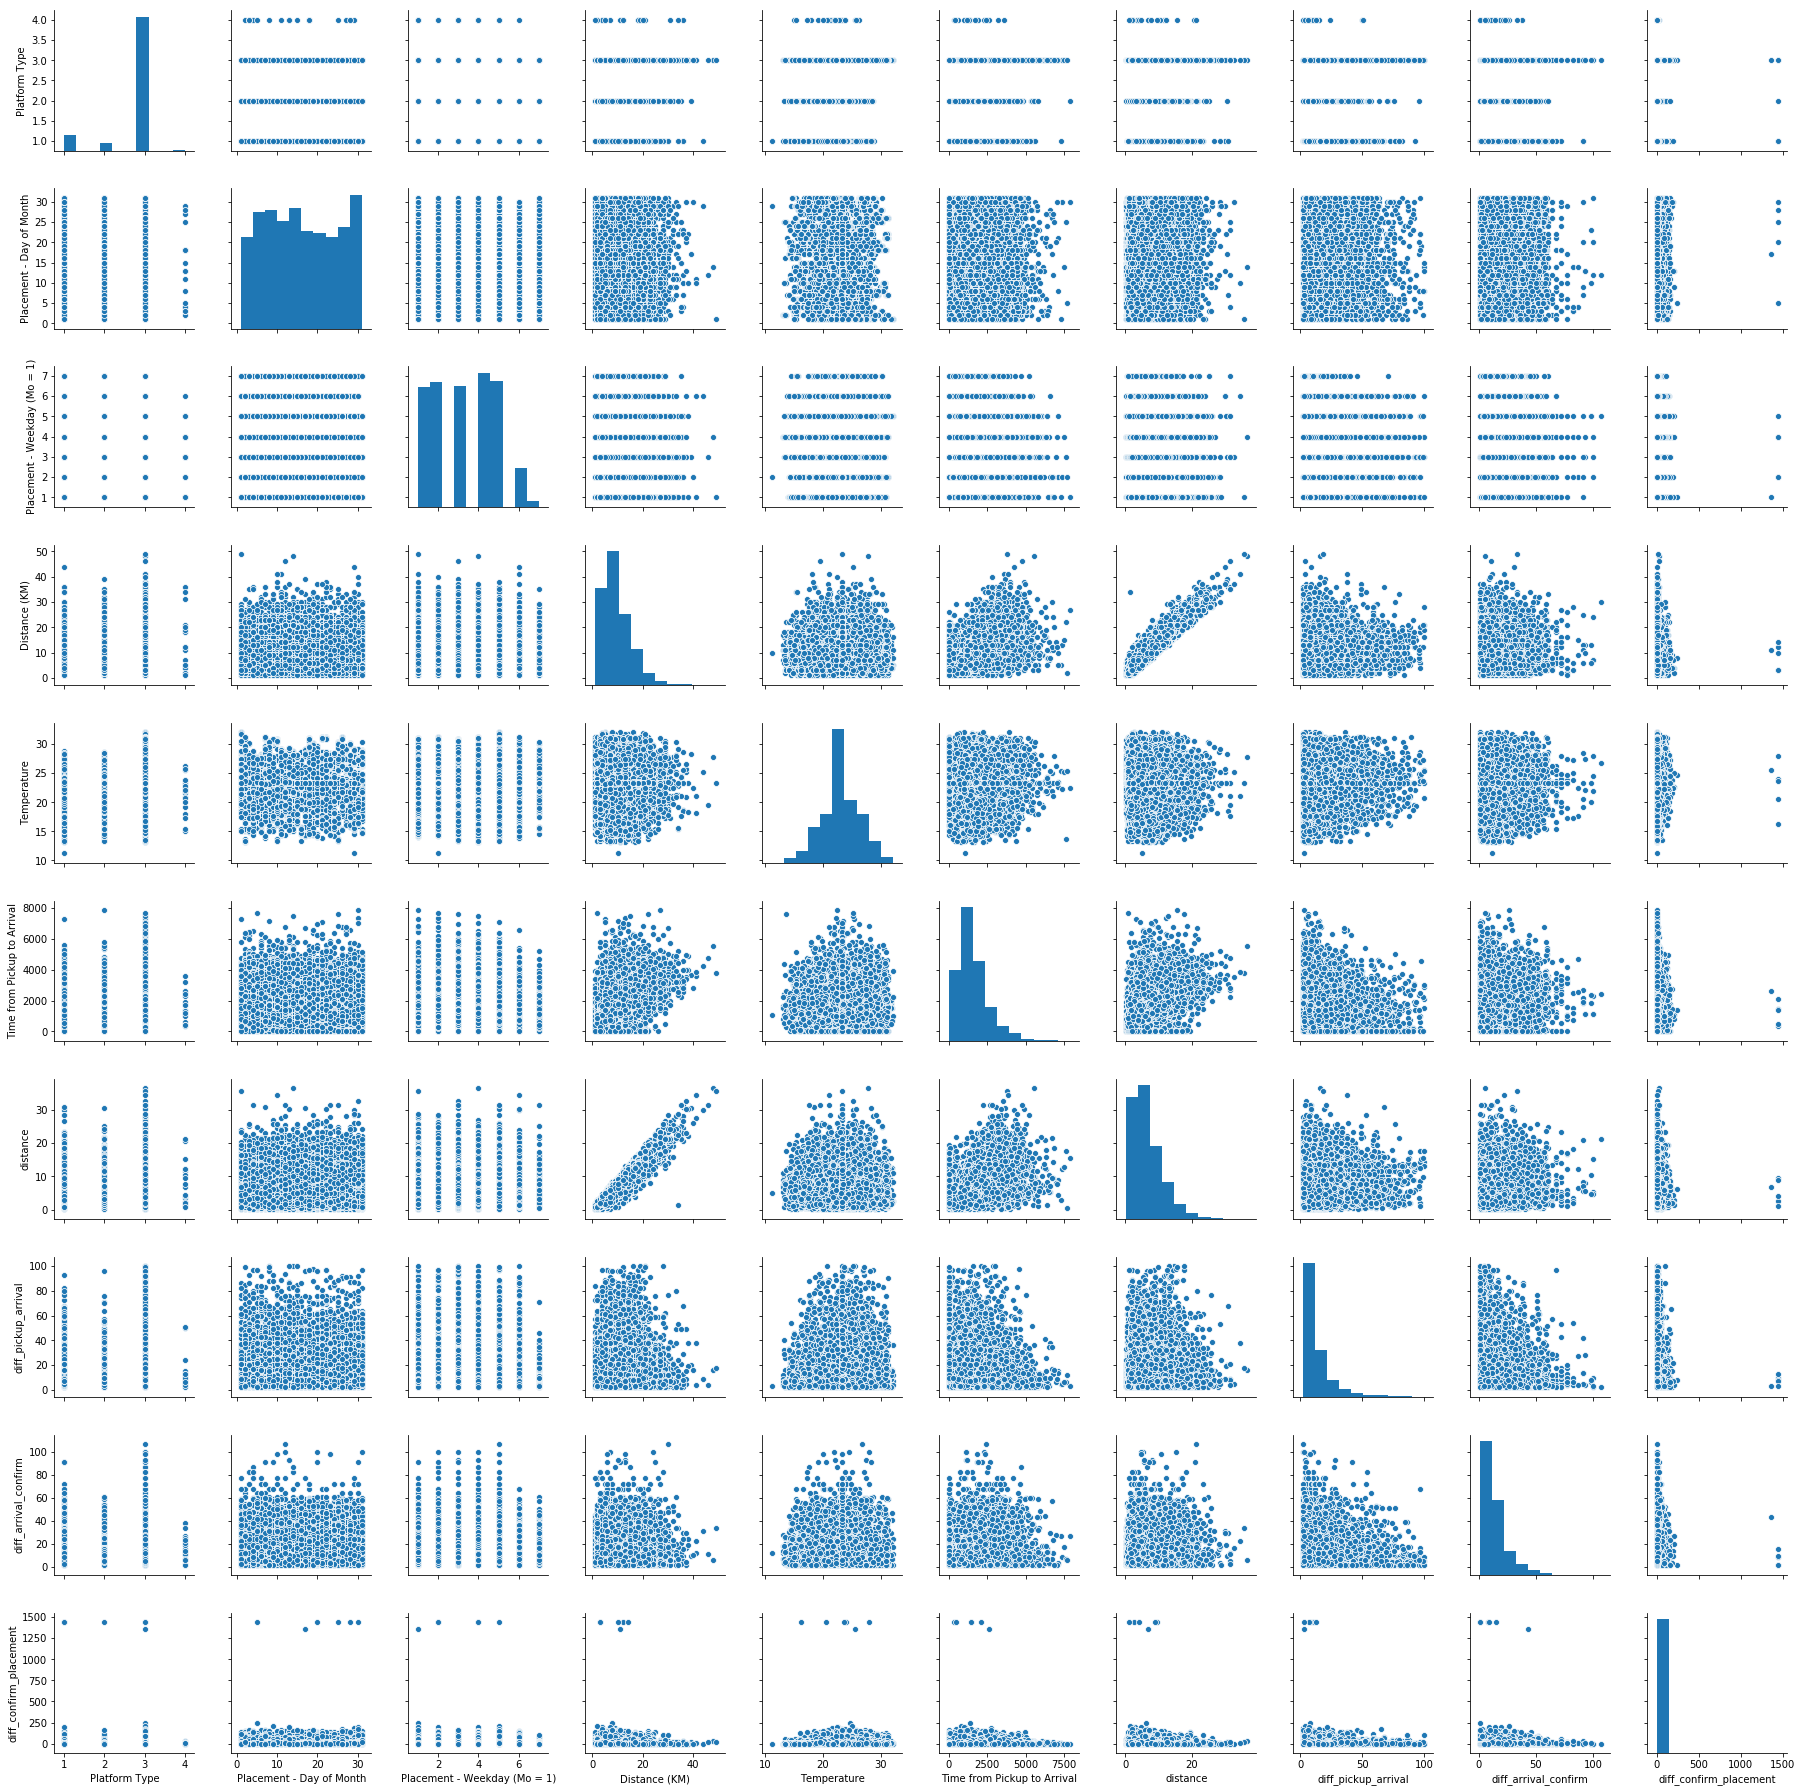

In [0]:
sns.pairplot(train)

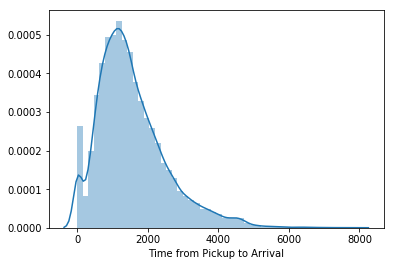

In [0]:
sns.distplot(train['Time from Pickup to Arrival']);

From the above graph, it is depicted that the time taken for confirmation of delivery on the bike is shown on the x-axis and the time from pickup to arrival through bike are shown on the y-axis. So, as we can see that the minimum confirmation time is in between 0.0001 and the maximum time is 0.0005 however, the time from pickup to arrival lies between 1000 second to 5000 seconds.

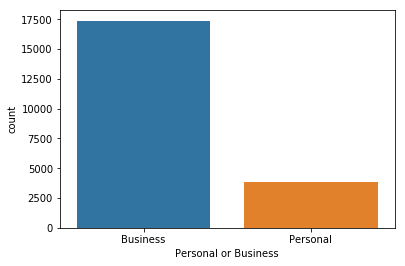

In [0]:
sns.countplot(train['Personal or Business'])

The above figure depicts the types of user involved in getting deliveries from bikes. The X-axis depicts the count of the users and y-axis represents the type of user. As we can, see in the above figure the count of business users is more as compared to the count of personal. However, a number of personal users is around 3000 which is less than half as compared to the business users.

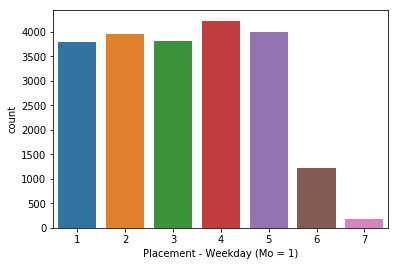

In [0]:
sns.countplot(train['Placement - Weekday (Mo = 1)'])

In the above figure x-axis represents the count of placements or deliveries and on the y-axis, it shows the weekdays. As we see the number of deliveries is maximum on Thursday around 4500 and the placements on Monday which assigned as value 1 has around 3700 deliveries and as depicted by the picture placements on Sunday and Saturday are ways less as compared to other weekdays.

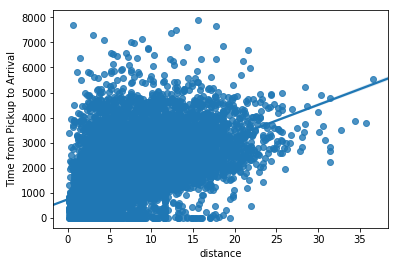

In [0]:
sns.regplot(x="distance", y="Time from Pickup to Arrival", data=train);

The above figure is designed by using regplot() function. This function helps to design the fit linear regression model. We can see that 5 to 20  distance delivered the goods in a minimum 1000 to 4000 seconds.

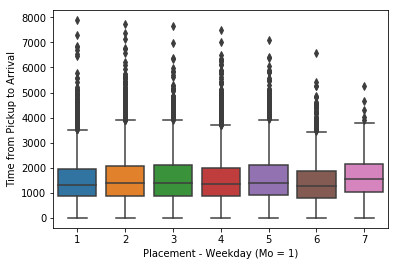

In [0]:
sns.boxplot(x="Placement - Weekday (Mo = 1)", y="Time from Pickup to Arrival", data = train )

**Cleaning remaining data.**

In [0]:
train['Personal or Business'] = train['Personal or Business'].map({'Business':1, 'Personal':2})
test['Personal or Business'] = test['Personal or Business'].map({'Business':1, 'Personal':2})

# Merge Rider dataset with train and test.

In [0]:
train_df = pd.merge(train, rider_data, on = 'Rider Id', sort = False)
test_df = pd.merge(test, rider_data, on = 'Rider Id', sort = False)

In [0]:
lb = LabelEncoder()

lb.fit(train_df['Rider Id'])


def encode_rider(dataset):
  try:
    return lb.transform(dataset[['Rider Id']])[0]
  except:
    return -999
  
train_df['rider_encoded'] = train.apply(encode_rider, axis = 1)
test_df['rider_encoded'] = test.apply(encode_rider, axis = 1)

**Calculating Experience of riders in years :**

In [0]:
train_df['experience'] = train_df['Age']/365
test_df['experience'] = test_df['Age']/365

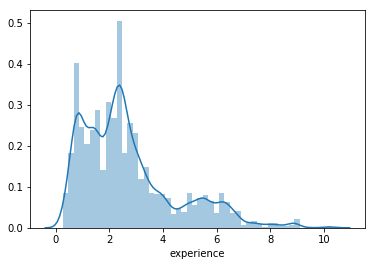

In [0]:
sns.distplot(train_df['experience'])

The above figure represents the experience of riders. We have merged the rider dataset with Train and Test dataset to calculate riders experience with the help of riders age. Furthermore, we can see that 3 years of experience have a good volume of riders. 

In [0]:
train_df.drop(['User Id', 'Rider Id'], axis = 1, inplace = True)
test_df.drop(['User Id', 'Rider Id'], axis = 1, inplace = True)

# Removing outliers from dependent variable

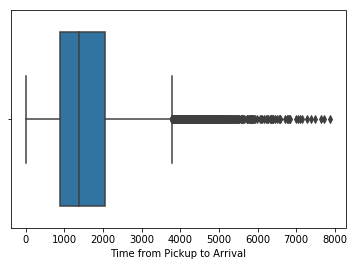

In [0]:
sns.boxplot(train['Time from Pickup to Arrival'])

The above figure gives the outlier for dependent variable by using boxplot() function which helps us to understand to remove the unnecessary data from the training dataset. With the help of this outlier, we have taken the data in train_df variable which includes the time from pickup to arrival within  >300 and <3500.

In [0]:
train_df = train_df[train_df['Time from Pickup to Arrival'] > 300]
train_df = train_df[train_df['Time from Pickup to Arrival'] < 3500]

# Dividing data into Train/Test for modelling.

In this section, we have mentioned the data modelling. To implement data modelling, we have used three different algorithms and proposed the best solution. We have done all the data pre-processing and implementation in python as this platform provides a good feature with different visualization function and different libraries which helped us to pre-process the data.  
Firstly, we have implemented the Random Forest Regression algorithm. To do a  further implementation, we have divided the data into train and test set and 20% data goes into test data set and remain goes into train dataset. We have trained the model using training datasets. This model responsibility is to understand the relationship between variables


In [0]:
X, y = train_df.drop(['Order No','Time from Pickup to Arrival'],axis = 1), train_df['Time from Pickup to Arrival']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state = 25)

In [0]:
'''         

** HYPER PARAMETER TUNING **


rf = RandomForestRegressor(random_state = 25)

param_grid = { 
    'n_estimators': [500, 1000, 2000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [2, 5, 10]
}

CV_rfr = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv= 3)
CV_rfr.fit(X_train, y_train)

CV_rfr.best_params_
'''

"         \n\n** HYPER PARAMETER TUNING **\n\n\nrf = RandomForestRegressor(random_state = 25)\n\nparam_grid = { \n    'n_estimators': [500, 1000, 2000],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth' : [4,5,6,7,8],\n    'min_samples_split' : [2, 5, 10],\n    'min_samples_leaf' : [2, 5, 10]\n}\n\nCV_rfr = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv= 3)\nCV_rfr.fit(X_train, y_train)\n\nCV_rfr.best_params_\n"

# Plotting Feature Importances.

Training done using Random Forest


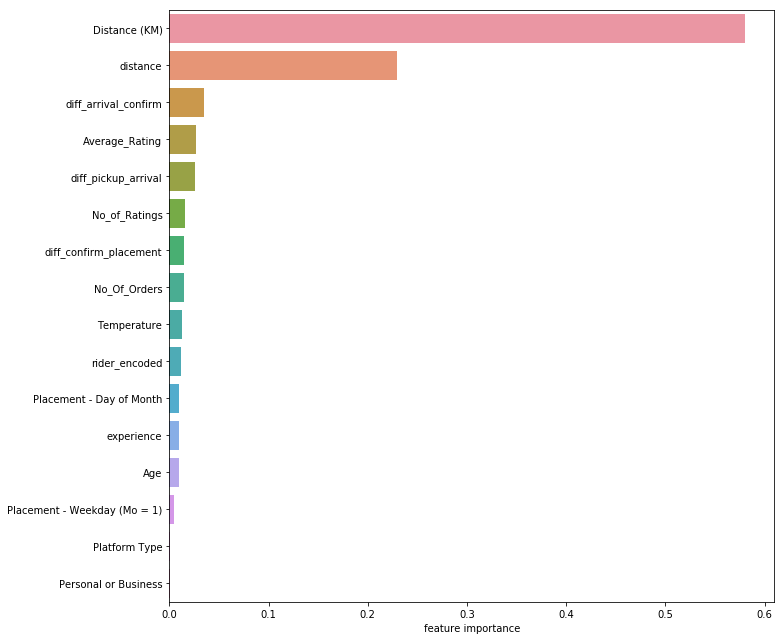

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=2000, max_features='auto', max_depth = 8,
                           min_samples_leaf = 5,min_samples_split = 2)
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [0]:
rf_pred = rf.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, rf_pred)))

534.7416335490329


This implementation gives us a brief idea about the features, which we can focus more to do further analysis. In this implementation, we have used different libraries and function of python like RandomForestRegressor library as well as barplot function to visualize the data. The Random Forest Regression gives the MSE(Mean Square Root) is 534.74.

# Training Linear Regressor and Support Vector Regressor for Ensemble.

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, lr_pred)))

542.4594817141409


Linear regression is one of the most simple statistical technique in machine learning which help us to interpret the value. The purpose of this algorithm implementation is to compare the score of mean square error and define the best solution to predict the arrival time for our problem. This algorithm gives the MSE(mean square error) with 542.45 value, which is a bit higher than the random forest MSE.

In [0]:
svr = SVR()

svr.fit(X_train, y_train)

svr_pred = svr.predict(X_val)

print(np.sqrt(mean_squared_error(y_val, svr_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


728.7895797415537


This is the third algorithm implementation called Support Vector Regression which gives the MSE 728.78. Now, we have three different MSE values which tell us the best solution for our problem. 

In [0]:
ensemble = svr_pred*0.15 + rf_pred*0.70 + lr_pred*0.15

print('Ensemble root mean squared is :',np.sqrt(mean_squared_error(y_val, ensemble)))

Ensemble root mean squared is : 539.5275125052468


In [0]:
lr_pred = lr.predict(test_df.drop(['Order No'], axis = 1))
svr_pred = svr.predict(test_df.drop(['Order No'], axis = 1))
rf_pred = rf.predict(test_df.drop(['Order No'], axis = 1))

In [0]:
ensemble = svr_pred*0.15 + rf_pred*0.70 + lr_pred*0.15

In [0]:
subbmissions['Time from Pickup to Arrival'] = ensemble

In [0]:
subbmissions.to_csv('Final_Submissions.csv', index = 0)

Evaluation

We have explore three different technique to predict the goods arrival time. These three technique have different score which help us to compare the results and tell the best technique to solve the problem of arrival time. In the above data modelling section, we have seen the three algorithm implementation and their score. After comparing the score of these algorithm, we can say that Random Forest Algorithm have provided us a good score which is better than other two algorithms. The score of Random Forest Regression algorithm is 534.74 and the Linear Regression and Support Vector Regression has 542.45 and 728.78 respectively. After discovering the three different scores, we get the clear picture of the best technique which is Random Forest Regression.

Conclusion

To conclude this report, the Random Forest Regression helping to predict the accurate arrival time of goods. This is best solution to predict the accurate arrival time, we have come across with this by comparing three different technique. This solution will help to business to improve the user experience, develop the communication and pre-planned for goods deliveries. 

Ethical

1.	We have download this dataset from zindi.africa website which they have gathered from Sendy platform thus, Sendy  may have privacy concern for this dataset. 
2.	 The second concern is, the recommended solution can predict the less accurate arrival time.
